# <center>**Proyecto de Innovación Educativa en Computación Cuántica**</center>
### <center>**Grupo 1 Viernes**</center>

## Authors

- Ruth Macías Asenjo
- Eduardo Martínez Valdelvira
- Fernando Poblet Estévez
- Miguel Cuenca González
- Juan Antonio Viñuelas Iniesta
-  Martín Zapata Ferguson

## Session 2: An introduction to Qiskit and to IBM's interface

In [3]:
%%capture
# Dependencies
%pip install qiskit
%pip install qiskit_aer
%pip install pylatexenc

# A classical simulator of quantum circuits
from qiskit_aer import AerSimulator

# Class QuantumCircuit, with methods (functions) to define quantum circuits
from qiskit import QuantumCircuit

# A function yielding a histogram with the probabilities of each of the eigenstates taken by the measured qubits
from qiskit.visualization import plot_histogram

# Class Statvector, to retrieve the state of the circuit
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp, Operator

# Other usual imports
from math import sqrt, pi
import numpy as np
import matplotlib.pyplot as plt

### **3. Executing circuits**

**Question:** <font color=teal> Why does the histogram have only one bar corresponding to |1>  ? </font>

**Answer:** Because the qubit is initialized to the state $|1\rangle$, it has no component along $|0\rangle$.

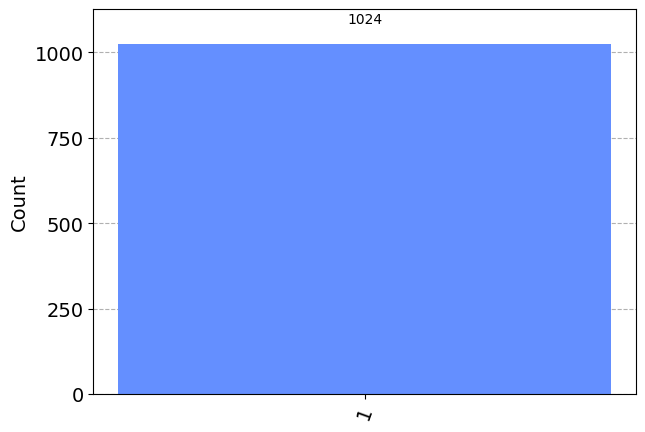

In [ ]:
sim = AerSimulator()
qc11 = QuantumCircuit(1,1) # circuit with 1 qubit y 1 classical bit
state_1 = [0,1] # this would be |1>, trivially normalized
qc11.initialize(state_1,0)
qc11.measure(0,0)
resultmeasure = sim.run(qc11).result() # Execute the circuite qc11 in the simulator
counts = resultmeasure.get_counts() # Results of the measurements
plot_histogram(counts) # Plot a histogram with that variable

#### **4. Generation of truly random numbers with a quantum computer**

<font color= teal> Question: Can you write in a piece of paper the initial state in the second line of the next paragraph?</font>

**Answer:** Let $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ in the computational basis, the initial state is $|+\rangle\otimes|+\rangle\otimes|+\rangle\otimes|+\rangle$. In the $\{|n\rangle\}_{n=0}^{15}$ basis, where $|n\rangle$ is the binary representation of n, taking the digits $0$ or $1$ to be qubits tensored with each other, $|\mathrm{init}\rangle=\frac{1}{4}\sum\limits_{n=0}^{15}|n\rangle$. Indeed, this is what the `draw` method shows, an equal superposition of states, which is what we would need to simulate a uniform probability distribution.

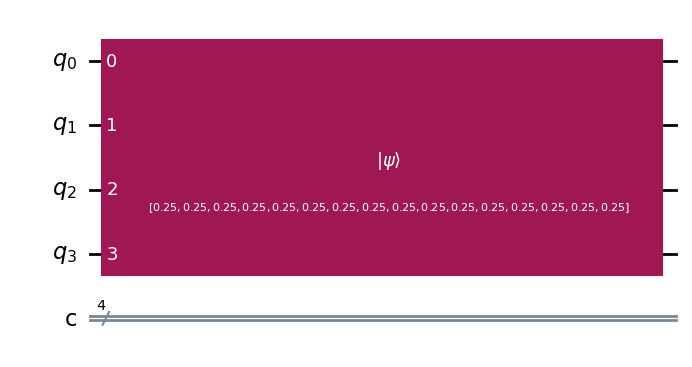

In [ ]:
qrng = QuantumCircuit(4,4)
init_state = np.kron([1,1],np.kron([1,1],np.kron([1,1],[1,1]))) # Kron is a Python command for Cartesian (or Kronecker) products
init_state_normal = init_state/np.linalg.norm(init_state)
qrng.initialize(init_state_normal,[0,1,2,3])
qrng.draw(output='mpl')

We may encapsulate random number generation in the following function:

In [ ]:
def QRNG(N_qubits): #a quantum random number generator
    qrng = QuantumCircuit(N_qubits)
    qrng.h(range(N_qubits))
    qrng.measure_all()
    result = sim.run(qrng, shots=1).result()
    counts = result.get_counts()
    decimal_result = int(list(counts.keys())[0], 2)
    return decimal_result

<font color=teal> Question: run the circuit a few times and write down the number obtained </font>

**Answer:** After running it a few times we obtained the following list of numbers:
`14, 3, 5, 9, 8, 12, 1, 10, 6, 11, 2, 6, 0, 10, 7, 13, 6, 14, 5, 1, 0, 14, 4`


In [ ]:
print(QRNG(4))

1


<font color=teal> Question: Write a loop that generates 32 random numbers and plot a histogram with their distribution </font>

**Answer:**

Text(0.5, 1.0, 'Quantum RNG distribution')

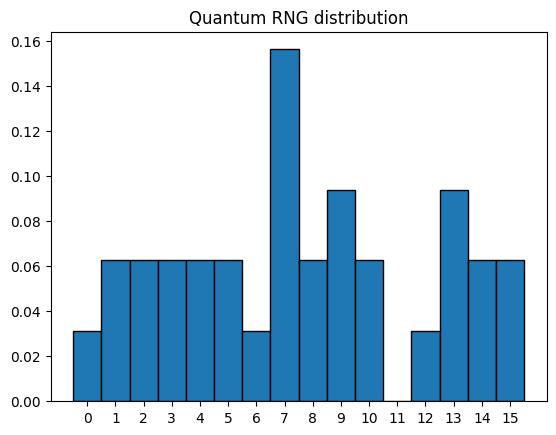

In [ ]:
import matplotlib.pyplot as plt

N_qubits = 4
N = 32
distrib = []
for _ in range(N):
    distrib.append(QRNG(N_qubits))

dim = 2**N_qubits
plt.hist(distrib, bins=range(dim+1), density=True, align='left', edgecolor='black', linewidth=1)
plt.xticks(ticks=range(dim), labels=range(dim))
plt.title('Quantum RNG distribution')

<font color=teal> Question: Write down in a piece of paper all the methods that you have learned here </font>

**Answer:** We have learned the following methods:

Applied to a `QuantumCircuit`
- `draw`
- `initialize`
- `measure`
- `measure_all`

Applied to an `AerSimulator`
- `run`

Applied to an `AerJob`
- `result`

Applied to a `Result`
- `get_counts`

#### **5. Quantum Fourier Transform**

The operation

$$\alpha |0\rangle + \beta | 1 \rangle \rightarrow  \alpha | 0 \rangle +\beta e^{2\pi i\ /\ 2^k} | 1 \rangle $$

Can be represented in matrix form as

$$R_k = \begin{pmatrix}
1 & 0 \\
0 & e^{2\pi i /2^k}
\end{pmatrix},$$

while one of the basic transformations in the Qiskit package is *PhaseGate*, with matrix representation

$$\text{PhaseGate}(\phi) = \begin{pmatrix}
1 & 0 \\
0 & e^{i\phi}
\end{pmatrix}.$$

Hence,

<font color="teal"> **Question 5.1.** Check that the following function implements the $R_k$ transformation: </font>

**Answer:**

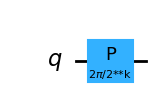

In [ ]:
from qiskit.circuit.library import PhaseGate, XGate
def R(k):
    return PhaseGate((2.*np.pi)/pow(2,k))

# Indeed, we can plot R(k) ∀ k with a parametrised circuit.
# We see the transformation is implemented as desired.
from qiskit.circuit import Parameter
k = Parameter('k')
ans = QuantumCircuit(1)
ans.append(R(k),[0])
ans.draw(output='mpl')

We can try this gate and compare it to what we should get for a couple of values of $k$

In [ ]:
MaxN=6
Result=[0]*MaxN
Real=[0]*MaxN
for i in range(MaxN):
  circ1 = QuantumCircuit(1)
  circ1.x(0)
  circ1.append(R(i),[0])
  psi = Statevector(circ1)
  Result[i]=psi[1]
  Real[i]=np.exp(2*np.pi*(1j)/2**i)
print('What we got        '+ str(Result))
print('What we should get ' + str(Real))

What we got        [(1-2.4492935982947064e-16j), (-1+1.2246467991473532e-16j), (6.123233995736766e-17+1j), (0.7071067811865476+0.7071067811865475j), (0.9238795325112867+0.3826834323650898j), (0.9807852804032304+0.19509032201612825j)]
What we should get [(1-2.4492935982947064e-16j), (-1+1.2246467991473532e-16j), (6.123233995736766e-17+1j), (0.7071067811865476+0.7071067811865475j), (0.9238795325112867+0.3826834323650898j), (0.9807852804032304+0.19509032201612825j)]


We can appreciate the $R_k$ gate performs the previously described transformation perfectly, although there is the same precision error in both calculations.

In sections 5.1-5.2 we're walked through programming a 3-register QFT. At the step at which we accomplish

$$| j_1j_2j_3\rangle \rightarrow | \psi_1\rangle = \frac{1}{\sqrt{2}}\left(\left|0\right\rangle+e^{2\pi i (j_1/2 +j_2/4)}\left|1\right\rangle\right)\otimes | j_2j_3\rangle.$$

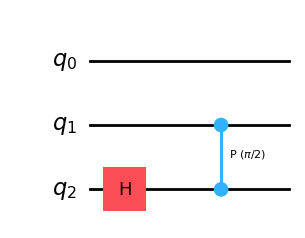

In [ ]:
qft_circuit = QuantumCircuit(3, name = 'QFT')
qft_circuit.h(2)
qft_circuit.draw()
qft_circuit.append(R(2).control(),[2,1])
qft_circuit.draw(output='mpl')

**Question 5.2** <font color="teal"> Write the state resulting from applying that transformation to the initial ket
 $| 010\rangle$.
    Check, with the <font color="blue">Statevector <font color="teal">
    class that the circuit generates the correct output.</font>
    
**Answer:** We may compute the resulting state by hand. It is $\frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)\otimes|10\rangle$ or, in the binary basis, $\frac{1}{\sqrt{2}}(|2\rangle+i|6\rangle)$.

In [ ]:
init_state = np.zeros(8)
init_state[2] = 1
qc = QuantumCircuit(3)
qc.initialize(init_state, range(3))
qc.append(qft_circuit, range(3))
phians = Statevector(qc)

# By printing the result, this checks out
phians

Statevector([0.00000000e+00+0.j        , 0.00000000e+00+0.j        ,
             7.07106781e-01+0.j        , 0.00000000e+00+0.j        ,
             0.00000000e+00+0.j        , 0.00000000e+00+0.j        ,
             4.32978028e-17+0.70710678j, 0.00000000e+00+0.j        ],
            dims=(2, 2, 2))


#### <font color="teal"> 5.3 QFT full exercise</font>

<font color="teal"> Please implement now the Quantum Fourier Transform as a gate acting over 5 qubits.  Apply this gate to the following states.</font>

$$ |\phi_1\rangle = \frac{1}{2^{5/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right)$$
$$ |\phi_2\rangle = \frac{1}{2^{5/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)$$
$$ |\phi_3\rangle = \frac{1}{2^{5/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)$$
$$ |\phi_4\rangle = \frac{1}{2^{5/2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle-\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)\left(\left|0\right\rangle+\left|1\right\rangle\right)$$
    
<font color="teal">Briefly comment on the results.  </font>

**Answer:**

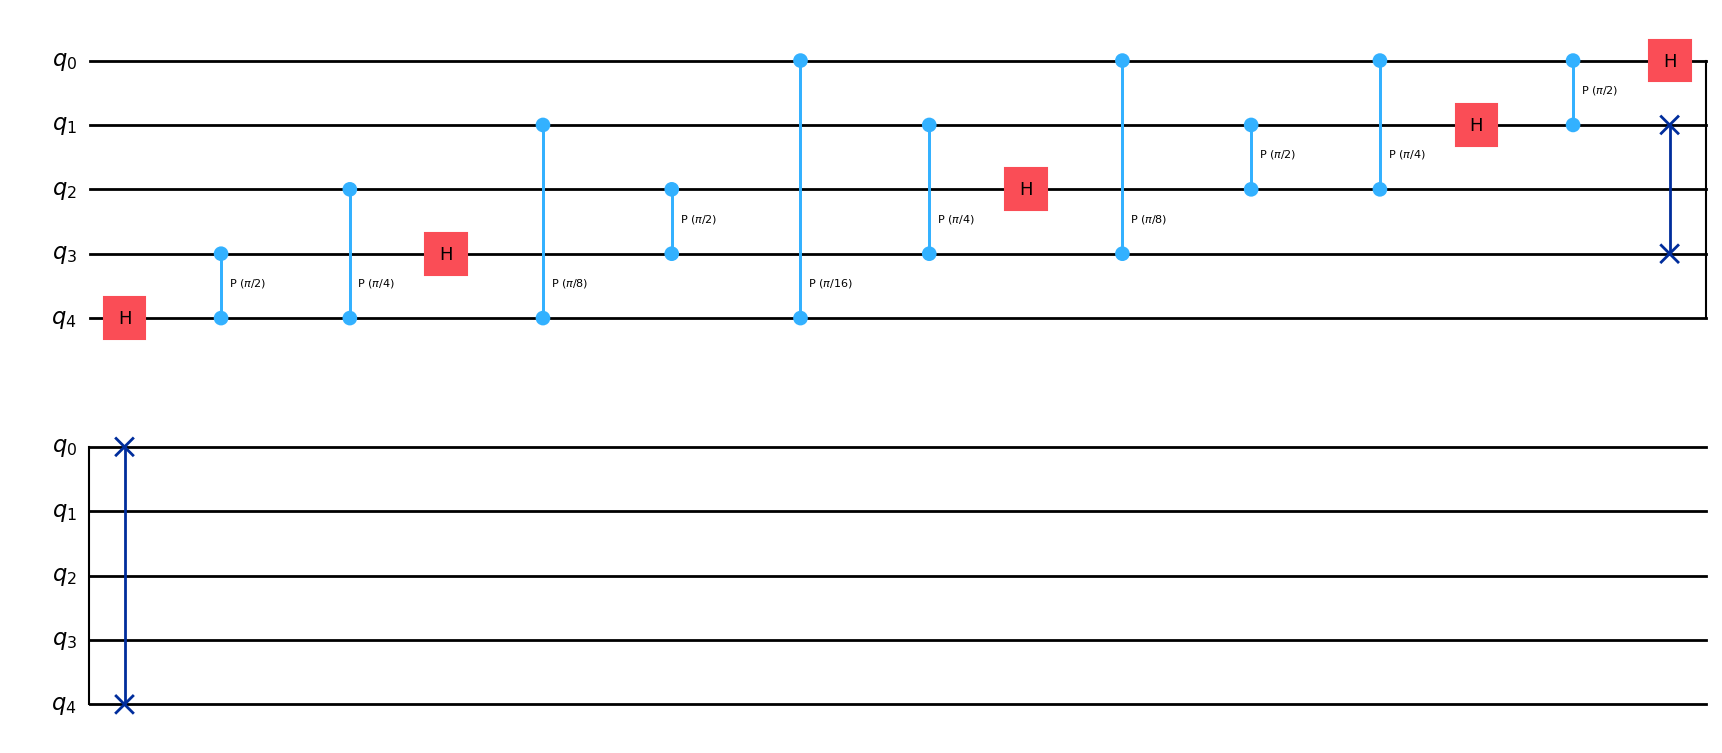

In [ ]:
# First, it is actually easier and more convenient to implement an N register QFT

def QFT(N):
    qc = QuantumCircuit(N)
    for i in np.arange(N-1, -1, -1):
        qc.h(i)
        for j in range(i-1, -1, -1):
            qc.append(R(i-j+1).control(),[i,j])
    for i in range(N//2):
        qc.swap(i, N-i-1)
    return qc

QFT(5).draw(output='mpl')

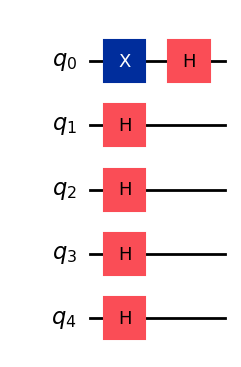

In [ ]:
# Next, let's notice the kets are
# |phi1> = |+>|+>|+>|+>|->
# |phi2> = |+>|+>|+>|->|+>
# |phi3> = |+>|+>|->|+>|+>
# |phi4> = |+>|->|+>|+>|+>
# So it will be easiest to prepare the initial states with Hadamard gates as follows:


def phi(n):
    qc = QuantumCircuit(5)
    qc.x(n)
    for i in range(5):
        qc.h(i)
    return qc

phi(0).draw(output='mpl')

In [ ]:
# Next we must create a 5D QFT circuit
qft5 = QFT(5).to_gate()
# And apply it to each prepared state

prec = 2 # Decimal precision
phihat = np.empty((4, 32), dtype=np.cdouble)
ket = []
for i in range(4):
    qc = phi(i)
    qc.append(qft5, range(5))
    phihat[i] = Statevector(qc)
    # Format ket as a linear combination of basis vectors (string)
    idx = np.where(np.abs(phihat[i])>10**-prec)
    ket.append('+'.join([f'({phihat[i][j]:.{prec}f})|{j}>' for j in idx[0]]))

# Print out Fourier transformed kets
ket

['(1.00+0.00j)|16>',
 '(0.50+0.50j)|8>+(0.50-0.50j)|24>',
 '(0.25+0.60j)|4>+(0.25+0.10j)|12>+(0.25-0.10j)|20>+(0.25-0.60j)|28>',
 '(0.12+0.63j)|2>+(0.12+0.19j)|6>+(0.12+0.08j)|10>+(0.12+0.02j)|14>+(0.12-0.02j)|18>+(0.12-0.08j)|22>+(0.12-0.19j)|26>+(0.12-0.63j)|30>']

Let $QFT5$ be the Quantum Fourier Transformation of 5 qubits, we obtained the following results:
- $QFT5|\phi_1\rangle = |16⟩$
- $\displaystyle QFT5|\phi_2\rangle = \frac{1}{2}(1+i)|8⟩+\frac{1}{2}(1-i)|24⟩$
-$\displaystyle QFT5|\phi_3\rangle \approx (0.25+0.60i)|4⟩+(0.25+0.10 i)|12⟩+(0.25-0.10 i) |20⟩ + (0.25-0.60i)|28⟩$
-$\displaystyle QFT5|\phi_4\rangle \approx (0.12+0.63i)|2⟩+(0.12+0.19i)|6⟩+(0.12+0.08i)|10⟩+(0.12+0.02i)|14⟩+(0.12-0.02i)|18⟩+(0.12-0.08i)|22⟩+(0.12-0.19i)|26⟩+(0.12-0.63i)|30⟩$



## Session 3: Execution of real quantum circuits on IBM's computers

In [1]:
%%capture
# Dependencies
%pip install qiskit
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install pylatexenc

# Importing standard Qiskit libraries
from qiskit import primitives
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp, Operator
import numpy as np

### **Random numbers**
The generation of random numbers using a classical simulator of a quantum machine was conducted during the second session. Now, let's generate "true random numbers"! To achieve this, we define a 3-qubit circuit that prepares each of them in the superposition $\tfrac{1}{\sqrt2}(|0\rangle+|1\rangle)$ and measures them in the computational basis ${|0\rangle,|1\rangle}$. This setup ensures that the measurement outcomes will be 0 or 1 with equal probabilities of 0.5.
#### <font color=teal> **Question 1**: Study the definition of the circuit with care </font>

**Answer:** It creates a barrier of Hadamard gates, which prepares each qubit in an equal superposition of $|0\rangle$ and $|1\rangle$. The circuit assigns three qubits to each random number to be generated, meaning the random numbers range between $0$ and $7$.

In [5]:
# How many random numbers will be produced in a single shot:
Nnumbers = 30  # Must be smaller than [127 qubits/3]=42
# Prepare the input circuit.
QRNG = QuantumCircuit(3*Nnumbers) # Three qubits per number
for j in range(Nnumbers):
  QRNG.h([(3*j+0),(3*j+1),(3*j+2)]) # Apply Hadamard gate to each of the qubits

QRNG.measure_all() # Measure all qubits

In [6]:
# Execute the circuit
sampler = primitives.Sampler()
job = sampler.run(QRNG, shots=1)

In [7]:
# The next statement can put your session on hold until the job runs and returns
result = job.result()

#### <font color=teal> **Question 2**:  Comment on your results </font>

**Answer:** We obtained the following result from the IBM Quantum Computer run in the lab with UCM tokens:

``[{236732400872330227231122054: 1.0}]``

After depuration we obtain the following list of numbers

``[6, 0, 2, 1, 6, 4, 4, 5, 2, 2, 3, 3, 4, 2, 2, 3, 2, 1, 2, 5, 2, 2, 2, 0, 2, 2, 7, 1, 4, 1]``

that we can plot in a *histogram*

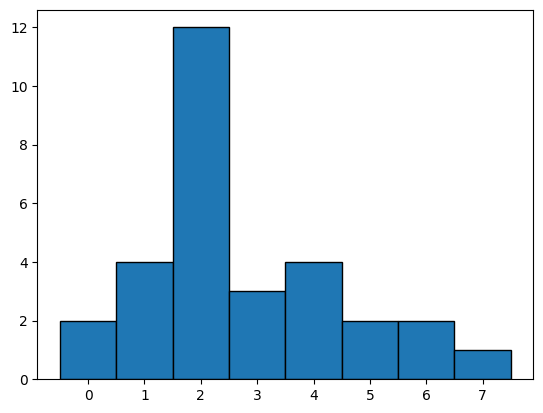

In [ ]:
RandomNumbers = [6, 0, 2, 1, 6, 4, 4, 5, 2, 2, 3, 3, 4, 2, 2, 3, 2, 1, 2, 5, 2, 2, 2, 0, 2, 2, 7, 1, 4, 1]
plt.hist(RandomNumbers, bins=range(9), align='left', edgecolor='black', linewidth=1)
plt.show()

### **Deutsch's algorithm**

To encode the action of a Boolean fuction, the Deutsch's algorithm uses the following operation over two qubits

$$
|x\rangle|y\rangle\to |x\rangle|y\oplus f(x)\rangle
$$

where $\oplus$ denotes the binary addition (i.e. the addition mod. 2).

#### <font color=teal> **Homework 1** (to do later after the lab on pen and paper): <br>  Prove that this is a unitary operation. </font>

**Answer:** It is clear that the quantum oracle preserves the norm of the basis vectors and is invertible, therefore it is unitary. If we take $(x,y)\in\{0,1\}^2, f(x)\in\{0,1\}$, we have that $y\oplus f(x)\in\{0,1\}$ &mdash; in other words, $|x\rangle|y\oplus f(x)\rangle$ is a valid (basis) ket of the 4D Hilbert space. Thus:

$$
(\langle x|\langle y|)U_f^\dagger U_f(|x\rangle|y\rangle) =(\langle x|\langle y\oplus f(x)|)(|x\rangle|y\oplus f(x)\rangle) = \langle x|x\rangle\langle y\oplus f(x)|y\oplus f(x)\rangle = 1
$$

Alternatively, given there exist a finite number of Boolean functions, we can calculate the oracle matrix for each $f$. If we place the control qubit $|x\rangle$ first, as we'll later do in the circuits (so $|y,x\rangle\rightarrow|y\oplus f(x), x\rangle$), the representations of $U_f$ are

$$
\begin{align}
f(x)&=0:\quad
U_f = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix},
&
f(x)&=1:\quad
U_f = \begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
\end{align}
$$

$$
\begin{align}
f(x)&=x: \quad
U_f = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix},
&
f(x)&=\neg x:\quad
U_f = \begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
\end{align}
$$

These matrices all represent permutations, which are unitary operations.

#### <font color=teal> **Question 2**: Complete the following cells to create quantum circuits for Oracle_f that decides whether $f$ is (or not) constant using the classical method with two evaluations </font>

**Answer:** To evaluate $f$ using the oracle we can measure the rightmost qubit in the following two states:

$$
U_f|0\rangle|0\rangle = |0\rangle|f(0)\rangle
$$

$$
U_f|1\rangle|0\rangle = |1\rangle|f(1)\rangle
$$

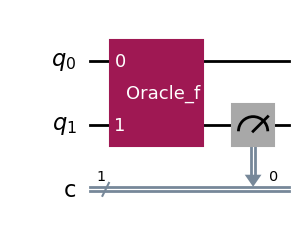

In [2]:
Oracle_f = Operator([[0,0,1,0],[0,1,0,0],[1,0,0,0],[0,0,0,1]])
Oracle_g = Operator([[0,0,1,0],[0,0,0,1],[1,0,0,0],[0,1,0,0]])

# First evaluation
Check_f0 = QuantumCircuit(2,1)
Check_f0.unitary(Oracle_f, [0, 1], label="Oracle_f")
Check_f0.measure(1, 0)
Check_f0.draw(output='mpl')

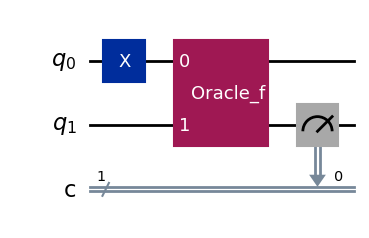

In [3]:
# Second evaluation
Check_f1 = QuantumCircuit(2,1)
Check_f1.x(0)
Check_f1.unitary(Oracle_f, [0, 1], label="Oracle_f")
Check_f1.measure(1,0)
Check_f1.draw(output='mpl')

In [11]:
# Run both evaluations
sampler_S = primitives.Sampler()
job_clf = sampler_S.run([Check_f0, Check_f1], shots=3)

In [12]:
# The next statement can put your session on hold until the job runs and returns
result_clf = job_clf.result()

#### <font color=teal> **Question 3**: By printing "result_clf.quasi_dists", explain why the following cell gives the calculated result for $f(0)$ and $f(1)$. </font>

**Answer:** In Qiskit a `SamplerResult` object has the `quasi_dists` attribute, wich stores the quasiprobability distribution of each circuit. The function $f(x)$ appears to be $\neg x$, and therefore a balanced function. Indeed, if we compare the `Oracle_f` with the matrix we calculated above for $f(x)=\neg x$, they coincide. Our run in the lab yielded the same results as show below.

In [5]:
# Print the measurement results
print(f"f(0) = {max(result_clf.quasi_dists[0])}")
print(f"f(1) = {max(result_clf.quasi_dists[1])}")

f(0) = 1
f(1) = 0


#### <font color=teal> **Question 4**: Complete the following cells to create quantum circuits for Oracle_g that solve the problem of whether $g$ is constant using the classical method of two evaluations </font>

**Answer:** We may repeat the previous process. We find that $g(x)=1$, therefore $g$ is a constant function. Our run in the lab with UCM tokens yielded the same result.

In [13]:
# First evaluation
Check_g0 = QuantumCircuit(2,1)
Check_g0.unitary(Oracle_g, [0, 1], label="Oracle_g")
Check_g0.measure(1, 0)

# Second evaluation
Check_g1 = QuantumCircuit(2,1)
Check_g1.x(0)
Check_g1.unitary(Oracle_g, [0, 1], label="Oracle_g")
Check_g1.measure(1,0)

# Run both evaluations
sampler_S = primitives.Sampler()
job_clg = sampler_S.run([Check_g0, Check_g1], shots=3)

In [14]:
# The next statement can put your session on hold until the job runs and returns
result_clg = job_clg.result()

# Print the measurement results
print(f"g(0) = {max(result_clg.quasi_dists[0])}")
print(f"g(1) = {max(result_clg.quasi_dists[1])}")

g(0) = 1
g(1) = 1


The idea of Deutsch's algorithm is based on the use of quantum superposition to attempt a simultaneous evaluation and comparison of $f(0)$ and $f(1)$ with a single action of the quantum oracle.

If $f(0)=f(1)$,

$$
U_f|+\rangle|-\rangle=\frac{1}{2}\big[|0\rangle|f(0)\rangle-|0\rangle|1\oplus f(0)\rangle+|1\rangle|f(0)\rangle-|1\rangle|1\oplus f(0)\rangle\big]$$
$$=\frac{1}{2}\big[\big(|0\rangle+|1\rangle\big)|f(0)\rangle-\big(|0\rangle+|1\rangle\big)|1\oplus f(0)\rangle\big]=|+\rangle \left[\frac{|f(0)\rangle-|1\oplus f(0)\rangle}{\sqrt{2}}\right]
$$

#### <font color=teal> **Homework question 5**: Prove (after the lab, on pen and paper): </font>
<font color=teal> the alternative case, that
if $f(0)\neq f(1)$, the final state becomes: </font>
    
$$
|-\rangle \left[\frac{|f(0)\rangle-|f(1)\rangle}{\sqrt{2}}\right].
$$

**Answer:** If $f(0)\neq f(1)$, then $f(0)\oplus 1=f(1)$ and $f(1)\oplus 1=f(0)$, therefore
$$
|+\rangle|-\rangle=\frac{1}{2}\big(|0\rangle|0\rangle-|0\rangle|1\rangle+|1\rangle|0\rangle-|1\rangle|1\rangle\big)\to $$
$$\frac{1}{2}\big[|0\rangle|f(0)\rangle-|0\rangle|1\oplus f(0)\rangle+|1\rangle|f(1)\rangle-|1\rangle|1\oplus f(1)\rangle\big] $$
$$=\frac{1}{2}\big[|0\rangle|f(0)\rangle-|0\rangle|f(1)\rangle+|1\rangle|f(1)\rangle-|1\rangle|f(0)\rangle\big] $$
$$=\frac{1}{2}\big[|0\rangle-|1\rangle\big]\big[|f(0)\rangle-|f(1)\rangle\big] =|-\rangle \left[\frac{|f(0)\rangle-|f(1)\rangle}{\sqrt{2}}\right].$$


After applying the oracle to $|+\rangle|-\rangle$, we may apply a Hadamard gate to the leftmost qubit and then measure it. This way we obtain $0$ if $f$ is constant and $1$ if $f$ is balanced.

#### <font color=teal> **Question 6**: Define a quantum circuit to implement Deutsch's algorithm with the function $f$ and another with the function $g$ </font>

**Answer:**

For the function $f$:

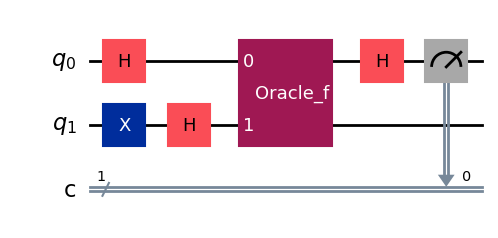

In [7]:
deutsch_f = QuantumCircuit(2,1)
deutsch_f.x(1)
deutsch_f.h([0, 1])
deutsch_f.unitary(Oracle_f, [0, 1], label="Oracle_f")
deutsch_f.h(0)
deutsch_f.measure(0,0)
deutsch_f.draw(output='mpl')

And for the function $g$ we just change the oracles:

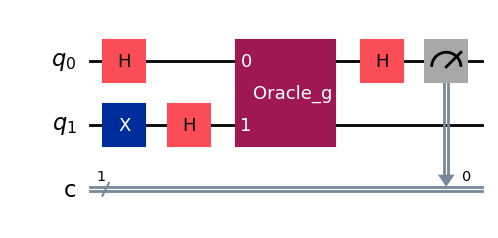

In [8]:
deutsch_g = QuantumCircuit(2,1)
deutsch_g.x(1)
deutsch_g.h([0, 1])
deutsch_g.unitary(Oracle_g, [0, 1], label="Oracle_g")
deutsch_g.h(0)
deutsch_g.measure(0,0)
deutsch_g.draw(output='mpl')

#### <font color=teal> **Question 7**: Does the result of your quantum computation using Deutsch's algorithm agree with the previous classical result?

**Answer:** The classical result was that $f$ is balanced (not constant) and $g$ is constant. After applying Deutsch's algorithm to both functions, we obtained the same result &mdash; that is, that $f$ is balanced and $g$ is constant. Our run in the lab with UCM tokens yielded the same result.

In [17]:
# Execute the circuit
sampler_S = primitives.Sampler()
job_DeutschS = sampler_S.run([deutsch_f, deutsch_g], shots=3)


In [19]:
# The next statement can put your session on hold until the job runs and returns
result_DeutschS = job_DeutschS.result()

# Print the measurement results
if max(result_DeutschS.quasi_dists[0]) == 0:
    print("f is constant")
else:
    print("f is balanced")
if max(result_DeutschS.quasi_dists[1])==0:
    print("g is constant")
else:
    print("g is balanced")

f is balanced
g is constant


### **Experimental measurement of a Bell inequality <br> (CHSH combination of correlators)**

If $\{A_1, A_2\}$ and $\{B_1,B_2\}$ are two pairs of observables (with dichotomic/binary outcome) of two spatially separated systems, the expected values of their products $\langle A_i B_j \rangle$ according to any local hidden variable model (that is, an attempt at trying to explain away quantum features with additional classical mechanics variables) satisfy the classical CHSH inequality

$$
|\langle A_1 B_1\rangle +\langle A_1 B_2\rangle + \langle A_2 B_1\rangle - \langle A_2 B_2\rangle|\leq 2 .
$$

Quantum theory, on the contrary, predicts that this inequality is violated for a suitable choice of observables, obtaining the maximum violation, in the case of two qubits, when

$$
A_1=X,\quad A_2=Y, \quad B_1=\frac{-(X+Y)}{\sqrt{2}}, \quad B_2=\frac{-(X-Y)}{\sqrt{2}}
$$
or rotationally equivalent configurations. Here $X$ and $Y$ denote the $\sigma_x$ and $\sigma_y$ Pauli matrices.

#### <font color=teal> **Question 2**: Using this command, define the four product observables that appear in the CHSH inequality: $A_1B_1$, $A_2B_1$, $A_1B_2$, and $A_2B_2$: </font>

**Answer:**

In [10]:
# Define pairs of observables for maximum violation of the CHSH innequality
A1B1 = SparsePauliOp.from_list([('XX', -1/np.sqrt(2)), ('XY', -1/np.sqrt(2))])
A1B2 = SparsePauliOp.from_list([('XX', -1/np.sqrt(2)), ('XY', +1/np.sqrt(2))])
A2B1 = SparsePauliOp.from_list([('YX', -1/np.sqrt(2)), ('YY', -1/np.sqrt(2))])
A2B2 = SparsePauliOp.from_list([('YX', -1/np.sqrt(2)), ('YY', +1/np.sqrt(2))])
Obs = [A1B1, A1B2, A2B1, A2B2]

#### <font color=teal> **Question 1**:  Define a circuit that prepares the "singlet state" of two qubits $|\Psi^-\rangle=\tfrac{1}{\sqrt2}(|01\rangle-|10\rangle)$.

**Answer:** The following circuit specifically prepares the state $\tfrac{i}{\sqrt2}(|01\rangle-|10\rangle)$, which is physically equivalent to the requested state.

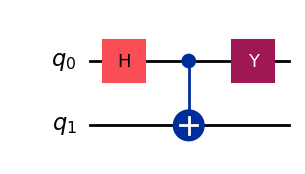

In [8]:
# Prepare the input circuit:
chsh_circuit = QuantumCircuit(2)
chsh_circuit.h(0) # Hadamard on the first qubit
chsh_circuit.cx(0,1) # NOT controlled to the first qubit
chsh_circuit.y([0]) # Y-Pauli gate to the first qubit
chsh_circuit.draw(output="mpl")

#### <font color=teal> **Question 3**: Calculate the simulated value obtained for the CHSH inequality jointly with its error </font>

**Answer:** The code we ran in the lab with UCM tokens yielded:

``The simulated result is 2.81824 + 0.04:``

``does it exceed 2 with sufficient statistical certainty?``


In [39]:
# Execute the circuit
shots_S = 5000
estimator_S = primitives.Estimator()
job_S = estimator_S.run([chsh_circuit]*len(Obs), Obs, shots=shots_S)
result_S = job_S.result()

# Print simulated expectation values
print(f"Simulated expectation values for the four correlators:\n  {result_S.values}")

Simulated expectation values for the four correlators:
  [ 0.70679991  0.69303455  0.70869596 -0.70636903]


In [34]:
# Retrieve sample variance and number of shots from metadata
metadata_S = result_S.metadata
variance_S = np.array([metadata_S[i]['variance'] for i in range(4)])

# Calculate and print simulated standard errors
Standard_errors_S = np.sqrt(variance_S / shots_S)
print(f"Simulated standard errors: {Standard_errors_S}")

Simulated standard errors: [0.01 0.01 0.01 0.01]


In [38]:
# CHSH value
values_S = result_S.values
CHSH_mean = abs(values_S[0] + values_S[1] + values_S[2] - values_S[3])
CHSH_uncertainty = np.sqrt(np.sum(Standard_errors_S**2))
print(f'''The simulated result is {CHSH_mean:.4f} ± {CHSH_uncertainty:.4f}:
does it exceed 2 with sufficient statistical certainty?''')

The simulated result is 2.8214 ± 0.0200:
does it exceed 2 with sufficient statistical certainty?


####  <font color=teal> **Question 4**: Compute, with a hand calculator or simple python commands, the experimental value obtained for the CHSH inequality jointly with its error from the quantum data obtained. </font>

**Answer:** The code we ran in the lab with UCM tokens yielded:

``The simulated result is 2.60215 + 0.41467:``

``does it exceed 2 with sufficient statistical certainty?``

In [45]:
# Execute the circuit
shots_Q = 50
estimator_Q = primitives.Estimator()
job_Q = estimator_Q.run([chsh_circuit]*len(Obs), Obs, shots=shots_Q)

In [46]:
# The next statement can put your session on hold until the job runs and returns
result_Q = job_Q.result()

# Print quantum expectation values
print(f"Quantum expectation values for the four correlators:\n  {result_S.values}")

Quantum expectation values for the four correlators:
  [ 0.70679991  0.69303455  0.70869596 -0.70636903]


In [47]:
# Retrieve sample variance and number of shots from metadata
metadata_Q = result_Q.metadata
variance_Q = np.array([metadata_Q[i]['variance'] for i in range(4)])

# Calculate and print quantum standard errors
Standard_errors_Q = np.sqrt(variance_Q / shots_Q)
print(f"Quantum standard errors: {Standard_errors_Q}")

Quantum standard errors: [0.1 0.1 0.1 0.1]


In [48]:
# CHSH value
values_S = result_S.values
CHSH_mean = abs(values_S[0] + values_S[1] + values_S[2] - values_S[3])
CHSH_uncertainty = np.sqrt(np.sum(Standard_errors_S**2))
print(f'''The quantum result is {CHSH_mean:.4f} ± {CHSH_uncertainty:.4f}:
does it exceed 2 with sufficient statistical certainty?''')

The quantum result is 2.8149 ± 0.0200:
does it exceed 2 with sufficient statistical certainty?
